In [231]:
import os
import nibabel as nib
import pathlib
import numpy as np
from nilearn import plotting as nlp
import matplotlib.pyplot as plt

In [55]:
%matplotlib inline

In [204]:
path_template = '../data/Misc/landmarks/'
path_landmarks = '../data/Misc/landmarks/mask_layout/'
pp = pathlib.Path(path_landmarks)
files_landmarks = [xx for xx in list(pp.glob('mask_left_*.nii.gz'))]
list_landmarks = [xx.name.split('.')[0] for xx in list(pp.glob('mask_left_*.nii.gz'))]
list_landmarks

['mask_left_tentorium_cerebelli',
 'mask_left_ventricul',
 'mask_left_calcarine_sulcus',
 'mask_left_parieto-occipital_fissure',
 'mask_left_hippocampal_formation',
 'mask_left_central_sulcus',
 'mask_left_cingulate_sulcus']

In [202]:
from platform import python_version
print(python_version())

3.5.2


In [205]:
# Assemble left landmarks and copy them to right 
template_vol = nib.load(os.path.join(path_template,'mni_icbm152_gm_tal_nlin_sym_09a.nii.gz'))
mask=np.zeros(template_vol.shape,dtype=float)
for ind,path_land in enumerate(files_landmarks):
    image = nib.load(str(path_land))
    img_vol = image.get_data()
    print('structure {} has min {} max {} '.format(path_land.name.split('.')[0],
                                                   np.min(img_vol),
                                                   np.max(img_vol)))
    mask[img_vol > 0]=1
    
vol_transpose = mask[::-1]
mask+= vol_transpose

structure mask_left_tentorium_cerebelli has min 0.0 max 1.0 
structure mask_left_ventricul has min 0.0 max 1.0 
structure mask_left_calcarine_sulcus has min 0.0 max 1.0 
structure mask_left_parieto-occipital_fissure has min 0.0 max 1.0 
structure mask_left_hippocampal_formation has min 0.0 max 1.0 
structure mask_left_central_sulcus has min 0.0 max 1.0 
structure mask_left_cingulate_sulcus has min 0.0 max 1.0 


In [243]:
import numpy as np
from scipy import signal

# first build the smoothing kernel
sigma = 1.0     # width of kernel
x = np.arange(-5,2,5)   # coordinate arrays -- make sure they contain 0!
y = np.arange(-5,2,5)
z = np.arange(-5,2,5)
xx, yy, zz = np.meshgrid(x,y,z)
kernel = np.exp(-(xx**2 + yy**2 + zz**2)/(2*sigma**2))

In [244]:
filtered = signal.convolve(mask, kernel, mode="same")

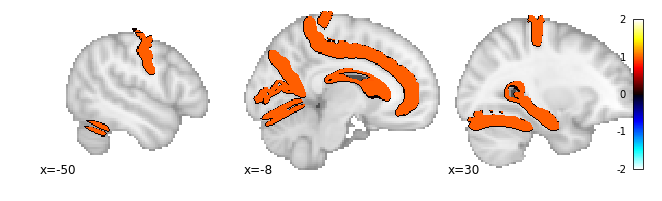

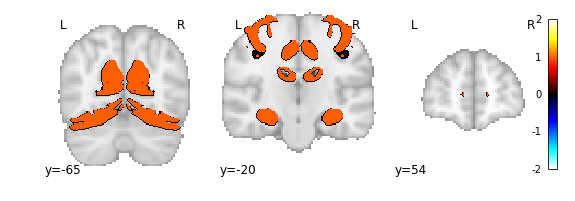

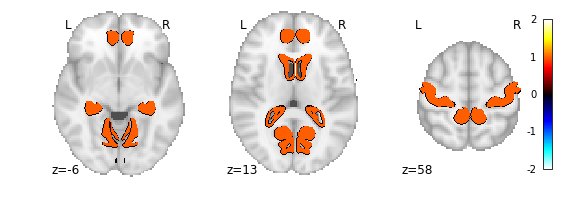

In [245]:
import nilearn 
mask_img = nib.Nifti1Image(filtered,affine=template_vol.affine)
#mask_img = nilearn.image.smooth_img(mask_img,0.6)
nlp.plot_stat_map(mask_img,display_mode='x',cut_coords=(-50 , -8 , 30))

nlp.plot_stat_map(mask_img,display_mode='y',cut_coords=(-65, -20, 54))

nlp.plot_stat_map(mask_img,display_mode='z',cut_coords=(-6, 13, 58))


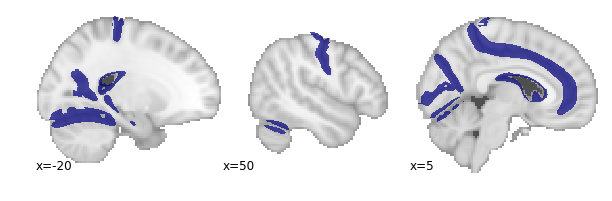

In [210]:
nlp.plot_roi(mask_img,display_mode='x',cut_coords=(-20,50,5))

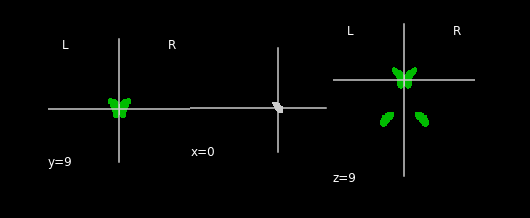

In [91]:
nlp.plot_epi(mask_img)

In [ ]:
nil